In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import cdist

In [3]:
mc_df = pd.read_csv("mcdonalds.csv")
mc_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
print(mc_df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [5]:
print(mc_df.shape)

(1453, 15)


In [6]:
print(mc_df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [7]:
MD_x = mc_df.iloc[:, :11]

MD_x = MD_x.map(lambda x: 1 if x == "Yes" else 0)
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [8]:
print(MD_x.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
#Principle Component Analysis
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [10]:
#Summary Of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [11]:
print("Standard deviation:", np.round(np.sqrt(pca.explained_variance_), 2))

Standard deviation: [0.76 0.61 0.5  0.4  0.34 0.31 0.29 0.28 0.27 0.25 0.24]


In [12]:
print("Proportion of Variance:", np.round(explained_variance, 4))

Proportion of Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]


In [13]:
print("Cumulative Proportion:", np.round(cumulative_variance, 4))

Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


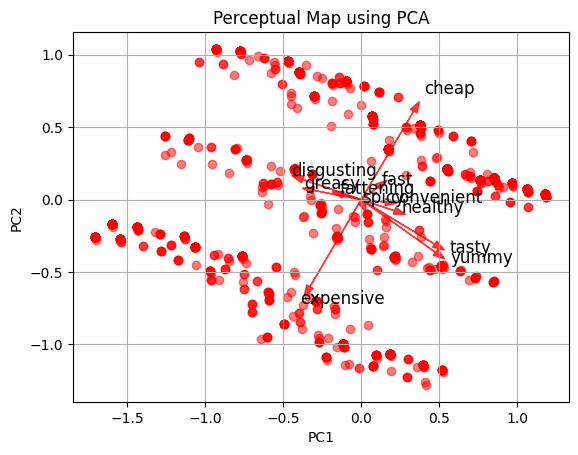

In [14]:
#PCA component Loading
MD_pca_2D = MD_pca[:, :2]  # Selecting PC1 and PC2
plt.scatter(MD_pca_2D[:, 0], MD_pca_2D[:, 1], color='red', alpha=0.5)

loadings_2D = pca.components_[:2, :]

features = mc_df.columns[:11]

for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings_2D[0, i], loadings_2D[1, i], 
              color='red', head_width=0.05, alpha=0.75)
    plt.text(loadings_2D[0, i] * 1.2, loadings_2D[1, i] * 1.2, 
             feature, color='black', fontsize=12)

# Setting labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map using PCA")

# Show plot
plt.grid()
plt.show()

In [25]:
#K-means clustering
num_clusters = range(2, 9)
kmeans_models = {}

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans


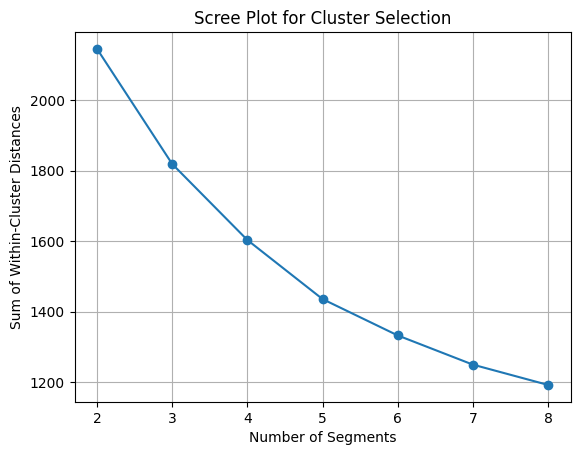

In [26]:
#Elbow method for cluster selection
inertia_values = [model.inertia_ for model in kmeans_models.values()]

plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Scree Plot for Cluster Selection")
plt.grid()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9440\2409202203.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rand_indices.values(), labels=num_clusters)


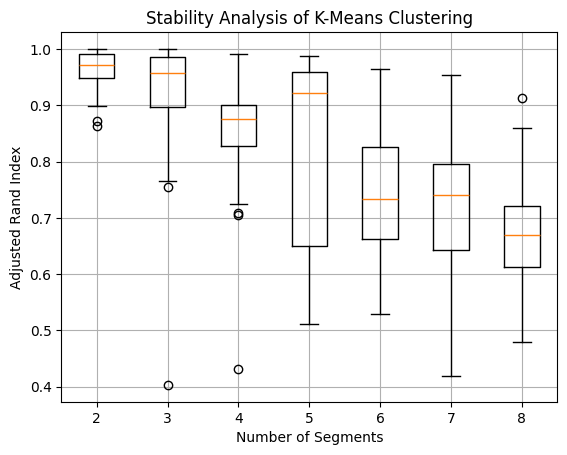

In [17]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
n_boot = 100
rand_indices = {k: [] for k in num_clusters}

# Perform bootstrapping to assess clustering stability
for k in num_clusters:
    for _ in range(n_boot):
        sample_data, sample_labels = resample(MD_x, kmeans_models[k].labels_)
        new_kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        new_kmeans.fit(sample_data)
        rand_indices[k].append(adjusted_rand_score(sample_labels, new_kmeans.labels_))

# Plot stability analysis (boxplot of adjusted Rand index)
plt.boxplot(rand_indices.values(), labels=num_clusters)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Stability Analysis of K-Means Clustering")
plt.grid()
plt.show()

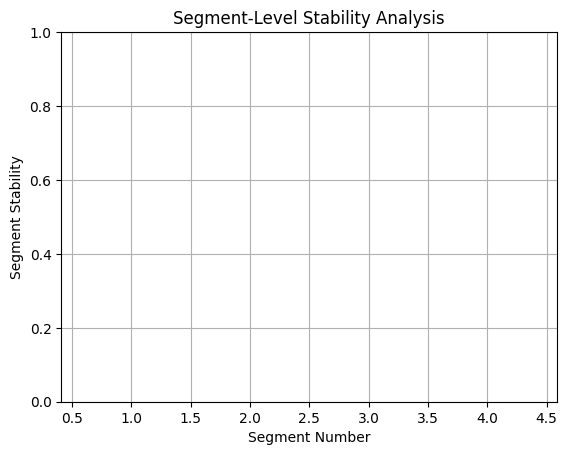

In [18]:
optimal_k = 4
MD_k4 = kmeans_models[optimal_k]
segment_stabilities = []
for cluster_id in range(optimal_k):
    indices = (MD_k4.labels_ == cluster_id)
    segment_data, segment_labels = MD_x[indices], MD_k4.labels_[indices]
    stability_scores = []

    for _ in range(n_boot):
        sample_data, sample_labels = resample(segment_data, segment_labels)
        new_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)
        new_kmeans.fit(sample_data)
        stability_scores.append(adjusted_rand_score(sample_labels, new_kmeans.labels_))

    segment_stabilities.append(np.mean(stability_scores))
    
plt.bar(range(1, optimal_k + 1), segment_stabilities)
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability Analysis")
plt.grid()
plt.show()


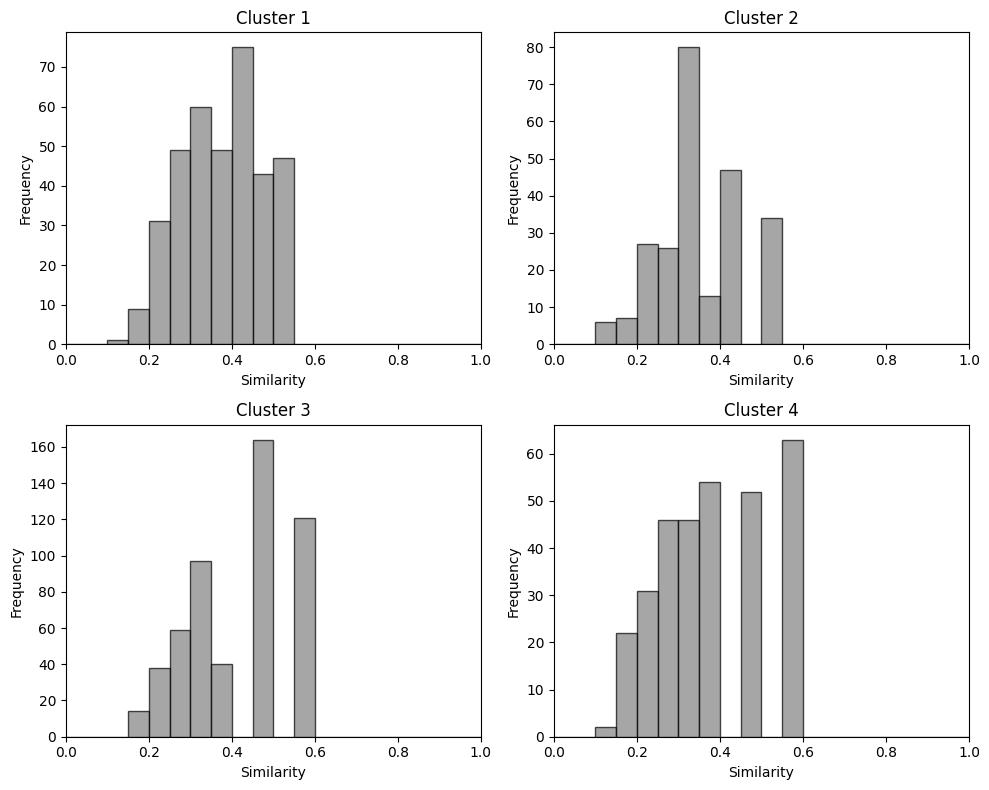

In [19]:
#histogram four segmentation
cluster_labels = MD_k4.labels_

similarity_scores = np.exp(-MD_k4.transform(MD_x)) 

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(4):
    cluster_data = similarity_scores[cluster_labels == i, i]  # Similarity scores for cluster i
    axes[i].hist(cluster_data, bins=20, range=(0, 1), alpha=0.7, color='grey', edgecolor='black')
    axes[i].set_title(f"Cluster {i+1}")
    axes[i].set_xlim(0, 1)
    axes[i].set_xlabel("Similarity")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

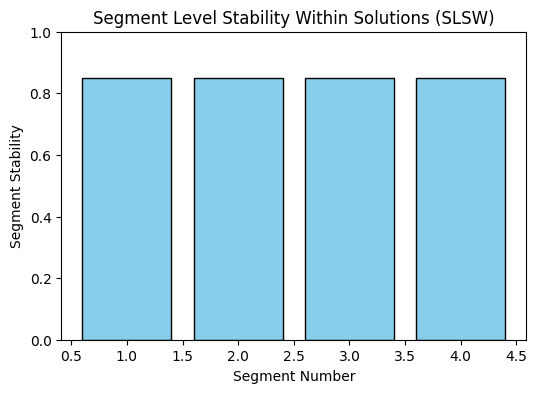

In [20]:
MD_km28 = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)  # 10 random starts
    MD_km28[k] = kmeans.fit(MD_x)  # Fit model and store in dictionary

# Step 2: Extract the 4-segment solution
MD_k4 = MD_km28[4]  # Extract the k=4 clustering model

# Step 3: Compute Segment-Level Stability (SLSW)
def calculate_slsw(X, clustering_solution, n_bootstrap=100):
    
    n_clusters = len(set(clustering_solution.labels_))
    stability_scores = np.zeros(n_clusters)

    for i in range(n_bootstrap):
        X_sample, y_sample = resample(X, clustering_solution.labels_, random_state=i)
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=i).fit(X_sample)
        stability_scores += [adjusted_rand_score(y_sample, kmeans.labels_)]

    return stability_scores / n_bootstrap  # Average over bootstrap runs

MD_r4 = calculate_slsw(MD_x, MD_k4)

# Step 4: Plot Segment Stability (SLSW)
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(MD_r4) + 1), MD_r4, color='skyblue', edgecolor='black')

plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Within Solutions (SLSW)")

plt.show()


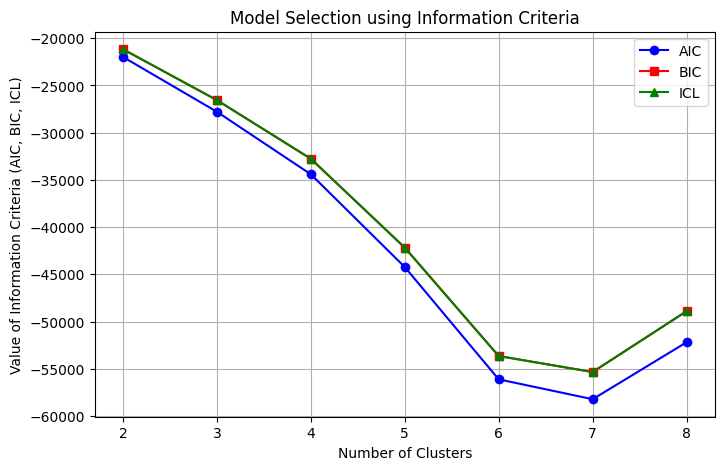

   Clusters  Log-Likelihood           AIC           BIC           ICL
0         2    11147.820925 -21985.641850 -21167.027072 -21167.655508
1         3    14126.449712 -27786.899425 -26556.336565 -26557.155961
2         4    17513.539059 -34405.083804 -32762.572863 -32763.854195
3         5    22500.931691 -44223.863382 -42169.404358 -42170.915296
4         6    28522.042011 -56110.084021 -53643.676917 -53645.297388
5         7    29652.476457 -58214.952914 -55336.597727 -55338.316007
6         8    26714.810172 -52183.620368 -48893.317099 -48895.196944


In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import Binarizer

np.random.seed(1234)
binarizer = Binarizer(threshold=0.5)
MD_x_bin = binarizer.fit_transform(MD_x)  # Convert to binary
results = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(MD_x_bin)

    log_likelihood = model.lower_bound_ * MD_x_bin.shape[0]  # Total log-likelihood
    aic = model.aic(MD_x_bin)  # Corrected: Now using GaussianMixture
    bic = model.bic(MD_x_bin)  # Corrected: Now using GaussianMixture
    
    # Approximate Integrated Completed Likelihood (ICL)
    entropy_penalty = np.sum(model.weights_ * np.log(model.weights_))
    icl = bic + entropy_penalty

    results.append([k, log_likelihood, aic, bic, icl])

df_results = pd.DataFrame(results, columns=["Clusters", "Log-Likelihood", "AIC", "BIC", "ICL"])

plt.figure(figsize=(8, 5))
plt.plot(df_results["Clusters"], df_results["AIC"], marker='o', label="AIC", color="blue")
plt.plot(df_results["Clusters"], df_results["BIC"], marker='s', label="BIC", color="red")
plt.plot(df_results["Clusters"], df_results["ICL"], marker='^', label="ICL", color="green")

plt.xlabel("Number of Clusters")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Model Selection using Information Criteria")
plt.legend()
plt.grid()
plt.show()

print(df_results)



In [22]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Step 2: Fit GMM using K-Means clusters as initialization
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Step 3: Compare K-Means vs GMM clusters in a table
comparison_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=["K-Means"], colnames=["GMM"])

print(comparison_table)

GMM        0    1    2    3
K-Means                    
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256


In [23]:
log_likelihood_m4a = gmm.score(MD_x) * MD_x.shape[0]  
log_likelihood_m4 = gmm.score(MD_x) * MD_x.shape[0] 

print(f"Log-Likelihood (MD.m4a): {log_likelihood_m4a}")
print(f"Log-Likelihood (MD.m4): {log_likelihood_m4}")

Log-Likelihood (MD.m4a): 13740.70387994845
Log-Likelihood (MD.m4): 13740.70387994845


In [28]:
like_counts = mc_df['Like'].value_counts().sort_index(ascending=False)
print("Original 'Like' counts:")
print(like_counts)

mc_df['Like_n'] = 6 - mc_df['Like']

like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()
print("\nTransformed 'Like_n' counts:")
print(like_n_counts)

Original 'Like' counts:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [29]:
features = mc_df.columns[:11].tolist() 
formula = "Like_n ~ " + " + ".join(features)

print("Regression Formula:", formula)
np.random.seed(1234)

X = mc_df[features]
y = mc_df["Like_n"]

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

cluster_labels = gmm.predict(X)
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

Regression Formula: Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


KeyError: 'Like_n'

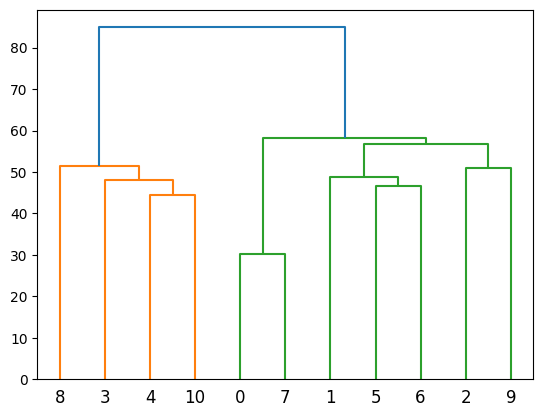

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
X_numeric = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage, dendrogram

dist_matrix = ssd.pdist(X_scaled_df.T)  
linkage_matrix = linkage(dist_matrix, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix)
plt.show()


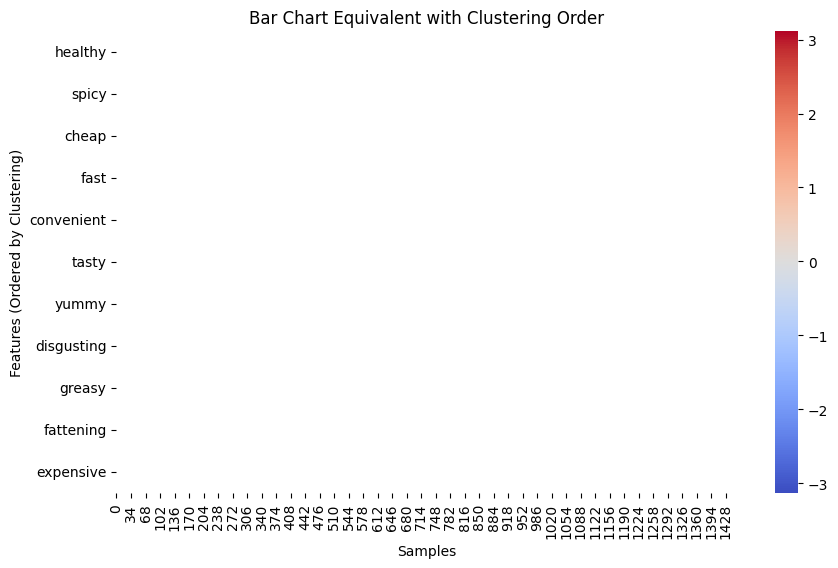

In [39]:
linkage_matrix = linkage(X_scaled_df.T, method='ward')

# Get the order of features from hierarchical clustering
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_features = [X_scaled_df.columns[i] for i in dendro['leaves'][::-1]]  # Reverse order like R

# Create bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled_df[ordered_features].T, cmap="coolwarm", cbar=True, linewidths=0.5)

plt.xlabel("Samples")
plt.ylabel("Features (Ordered by Clustering)")
plt.title("Bar Chart Equivalent with Clustering Order")
plt.show()

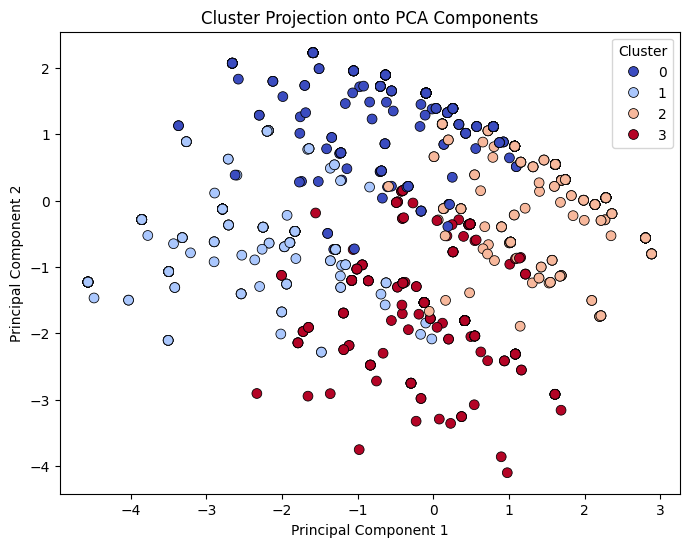

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='coolwarm', s=50, edgecolor='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Projection onto PCA Components")
plt.legend(title="Cluster")
plt.show()

<Figure size 800x600 with 0 Axes>

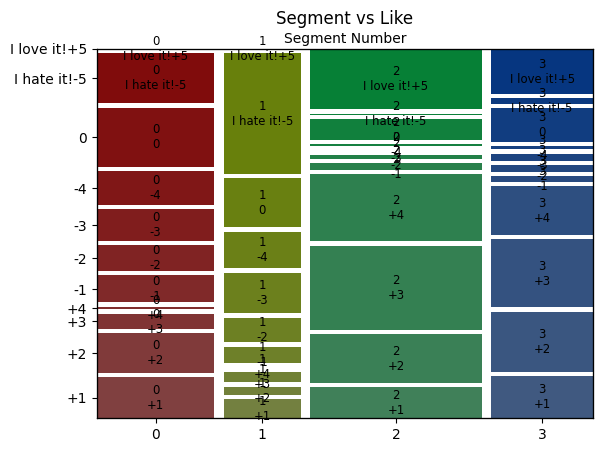

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
contingency_table = pd.crosstab(cluster_labels, mc_df['Like'])

# Generate a mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Segment vs Like", gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.show()

<Figure size 800x600 with 0 Axes>

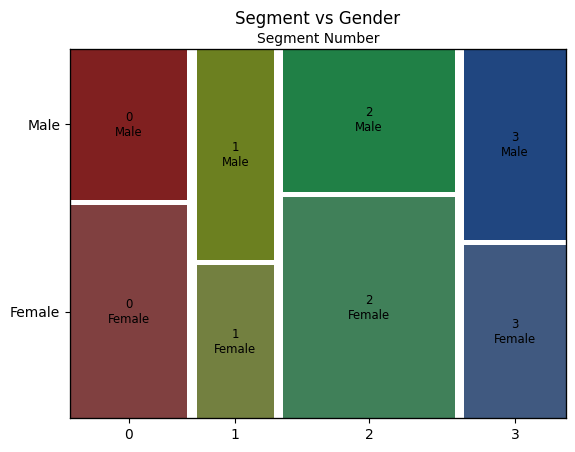

In [45]:
contingency_table = pd.crosstab(cluster_labels, mc_df['Gender'])

# Generate a mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Segment vs Gender", gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Gender")
plt.show()

In [48]:
features = ['Like', 'Age', 'VisitFrequency', 'Gender'] 
X = mc_df[features]


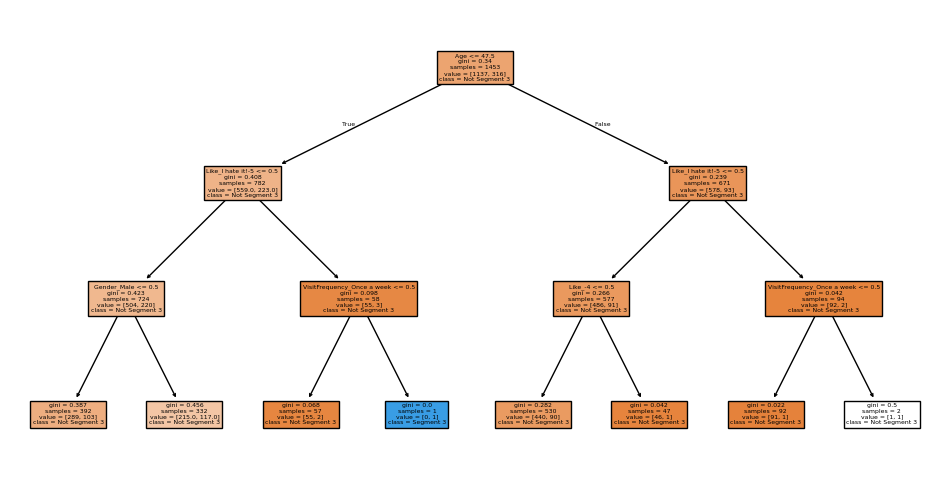

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

mc_df['target'] = (cluster_labels == 3).astype(int)

features = ['Like', 'Age', 'VisitFrequency', 'Gender']
X = mc_df[features]
y = mc_df['target']

X = pd.get_dummies(X, drop_first=True)

tree = DecisionTreeClassifier(max_depth=3, random_state=1234)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=["Not Segment 3", "Segment 3"], filled=True)
plt.show()


In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans.fit(X) 
mc_df['MD_k4'] = kmeans.labels_

visit_means = mc_df.groupby('MD_k4')['VisitFrequency'].mean()
print(visit_means)


MD_k4
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [58]:
mc_df['Like'] = pd.to_numeric(mc_df['Like'], errors='coerce')

like_means = mc_df.groupby('MD_k4')['Like'].mean()

print(like_means)


MD_k4
0    1.746377
1    0.737500
2    0.454887
3    1.131757
Name: Like, dtype: float64


In [59]:
mc_df['Female'] = (mc_df['Gender'] == 'Female').astype(int)

female_means = mc_df.groupby('MD_k4')['Female'].mean()

# Display the result
print(female_means)


MD_k4
0    0.524862
1    0.571429
2    0.546269
3    0.525606
Name: Female, dtype: float64


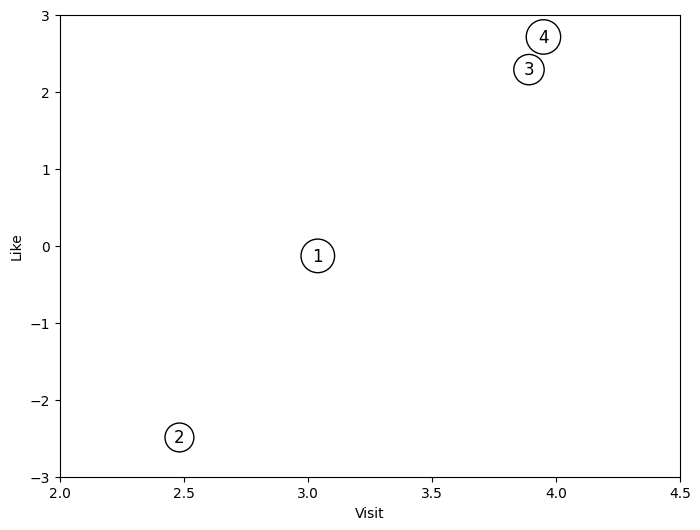

In [63]:
visit = np.array([3.040426, 2.482490, 3.891975, 3.950249])
like = np.array([-0.1319149, -2.4902724, 2.2870370, 2.711442])
female = np.array([0.5851064, 0.4319066, 0.4783951, 0.6144279])

bubble_size = 10 * female * 100  

plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=bubble_size, facecolors='none', edgecolors='black')

for i, (x, y) in enumerate(zip(visit, like), 1):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center')

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel("Visit")
plt.ylabel("Like")

# Show plot
plt.show()